In [1]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

filterwarnings('ignore'); # Ignore warning messages
print();
collect();


CPU times: user 2.84 s, sys: 102 ms, total: 2.95 s
Wall time: 995 ms


In [2]:
class color:
    GRAY = '\033[90m'
    LIGHT_BLUE = '\033[94m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    BOLD = '\033[1m'
    RED = '\033[91m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    MAGENTA = '\033[95m'
    WHITE = '\033[97m'
    BLACK = '\033[30m'
    LIGHT_RED = '\033[91m'
    LIGHT_GREEN = '\033[92m'
    LIGHT_YELLOW = '\033[93m'
    LIGHT_BLUE = '\033[94m'
    LIGHT_MAGENTA = '\033[95m'
    LIGHT_CYAN = '\033[96m'
    LIGHT_WHITE = '\033[97m'
    PINK = '\033[95m'
    RESET = '\033[0m'

In [3]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('../data/Language Detection.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    # Handle other exceptions
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

print(color.BLUE)
collect();

Dataset loaded successfully.

CPU times: user 66 ms, sys: 0 ns, total: 66 ms
Wall time: 65.6 ms


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [5]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
# Checking the data shape

print(f'{color.BLUE}The dataset contains{color.END} {df.shape[0]} {color.BLUE}rows and {color.END}', end='')
print(f'{df.shape[1]} {color.BLUE}columns{color.END}')

The dataset contains 10337 rows and 2 columns


# Handle Duplicate values

In [7]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'The data contains {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}duplicate values')

The data contains 66 duplicate values


In [8]:
# Remove duplicate rows in place
df.drop_duplicates(inplace=True)

# Check the shape of the dataset to confirm duplicates are removed
print(color.GREEN + f"Dataset after removing duplicates: {df.shape}" + color.END)

Dataset after removing duplicates: (10271, 2)


# Missing Values

In [9]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the missing values in green
print(color.GREEN + "Missing Values in Each Column:" + color.END)
print(missing_values)

Missing Values in Each Column:
Text        0
Language    0
dtype: int64


# Text Preprocessing

In [10]:
# Define preprocessing function
def preprocess_text(text):
    # Remove punctuation, numbers, and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    text = re.sub(r'\d+', '', text)
    return text

df['Text'] = df['Text'].apply(preprocess_text)

# EDA

## Language Distribution

In [11]:
# 1. Language frequency analysis
df['Language'].value_counts()

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64

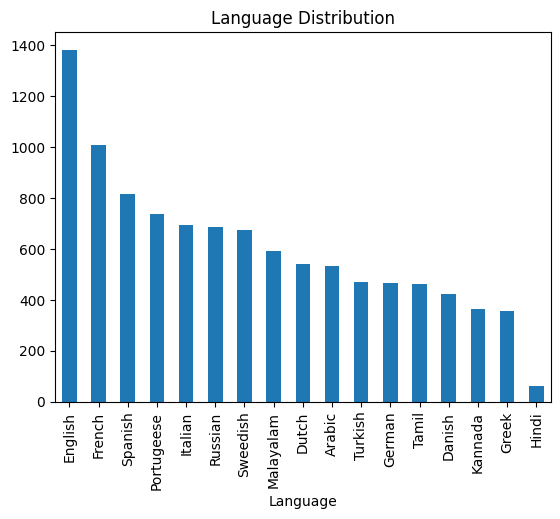

In [12]:
df['Language'].value_counts().plot(kind='bar')
plt.title('Language Distribution')
plt.show()

## Word Frequency

In [13]:
from collections import Counter
all_words = ' '.join(df['Text']).split()
word_freq = Counter(all_words)
word_freq.most_common(10)  # Top 10 most frequent words

[('de', 3489),
 ('a', 1876),
 ('the', 1614),
 ('en', 1525),
 ('la', 1470),
 ('क', 1404),
 ('que', 1295),
 ('in', 1225),
 ('of', 1130),
 ('ह', 1029)]

In [14]:
# Manually calculate the number of words in each row and create a new column
num_of_words = []
for text in df['Text']:
    word_count = len(str(text).split())  # Split the text into words and count them
    num_of_words.append(word_count)

# Add the manually calculated column to the DataFrame
df['Num_of_Words'] = num_of_words

# Label encoding

In [15]:
# Separating independent and dependent features
X = df["Text"]  # Independent feature
y = df["Language"]  # Dependent feature

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Label encode the dependent feature
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [18]:
# Display the mapping of labels to encoded values
for idx, label in enumerate(encoder.classes_):
    print(f"Encoded Value: {idx} -> Language: {label}")

Encoded Value: 0 -> Language: Arabic
Encoded Value: 1 -> Language: Danish
Encoded Value: 2 -> Language: Dutch
Encoded Value: 3 -> Language: English
Encoded Value: 4 -> Language: French
Encoded Value: 5 -> Language: German
Encoded Value: 6 -> Language: Greek
Encoded Value: 7 -> Language: Hindi
Encoded Value: 8 -> Language: Italian
Encoded Value: 9 -> Language: Kannada
Encoded Value: 10 -> Language: Malayalam
Encoded Value: 11 -> Language: Portugeese
Encoded Value: 12 -> Language: Russian
Encoded Value: 13 -> Language: Spanish
Encoded Value: 14 -> Language: Sweedish
Encoded Value: 15 -> Language: Tamil
Encoded Value: 16 -> Language: Turkish


## Term Frequency-Inverse Document Frequency

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report# Initialize the MultinomialNB classifier
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train_encoded)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

Accuracy: 0.95
              precision    recall  f1-score   support

      Arabic       1.00      0.96      0.98       121
      Danish       0.99      0.93      0.96        85
       Dutch       1.00      0.94      0.97       108
     English       0.77      1.00      0.87       290
      French       0.97      0.99      0.98       210
      German       1.00      0.95      0.98        86
       Greek       1.00      0.94      0.97        65
       Hindi       1.00      0.62      0.77         8
     Italian       1.00      0.96      0.98       130
     Kannada       1.00      0.94      0.97        70
   Malayalam       1.00      0.91      0.95       122
  Portugeese       0.99      0.96      0.98       139
     Russian       1.00      0.97      0.99       119
     Spanish       0.99      0.97      0.98       160
    Sweedish       0.98      0.97      0.98       150
       Tamil       1.00      0.88      0.94        86
     Turkish       1.00      0.81      0.90       106

    accurac

## CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def custom_tokenizer(text):
    return text.split()  # Simple space-based tokenizer

# Transform text data using CountVectorizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
X_train_counts = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_counts = vectorizer.transform(X_test)        # Transform test data

In [22]:
# Train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train_counts, y_train_encoded)

# Evaluate the model
y_pred = model.predict(X_test_counts)
accuracy = accuracy_score(y_test_encoded, y_pred)
classification = classification_report(y_test_encoded, y_pred, target_names=encoder.classes_)

In [23]:
# Display results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification)

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       121
      Danish       0.99      0.96      0.98        85
       Dutch       1.00      0.97      0.99       108
     English       0.88      1.00      0.94       290
      French       0.99      0.99      0.99       210
      German       1.00      1.00      1.00        86
       Greek       1.00      0.98      0.99        65
       Hindi       1.00      1.00      1.00         8
     Italian       1.00      0.97      0.98       130
     Kannada       1.00      0.97      0.99        70
   Malayalam       1.00      0.98      0.99       122
  Portugeese       0.98      0.97      0.97       139
     Russian       1.00      0.98      0.99       119
     Spanish       0.99      0.96      0.98       160
    Sweedish       0.99      0.98      0.98       150
       Tamil       1.00      0.98      0.99        86
     Turkish       1.00      0.92      0.9

In [24]:
# Prediction function
def predict(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        print("Invalid input text. Please provide valid text.")
        return
    
    # Preprocess the input
    processed_text = preprocess_text(text)
    
    # Convert text to bag-of-words vector
    x = vectorizer.transform([processed_text])
    
    # Predict the language
    lang = model.predict(x)
    lang = encoder.inverse_transform(lang)
    print("The language is:", lang[0])

In [25]:
predict("This is an English sentence.")  # Example in English
predict("हम तेरे बिन अब रह नहीं सकते")

The language is: English
The language is: Hindi


In [26]:
# import pickle

# # Save the trained model
# with open('language_model.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)

# # Save the CountVectorizer
# with open('vectorizer.pkl', 'wb') as vectorizer_file:
#     pickle.dump(vectorizer, vectorizer_file)

# # Save the LabelEncoder
# with open('label_encoder.pkl', 'wb') as encoder_file:
#     pickle.dump(encoder, encoder_file)

In [27]:
import joblib

# Save the trained model using joblib
joblib.dump(model, '../models/language_model.joblib')

# Save the CountVectorizer using joblib
joblib.dump(vectorizer, '../models/vectorizer.joblib')

# Save the LabelEncoder using joblib
joblib.dump(encoder, '../models/label_encoder.joblib')

print("Model, vectorizer, and encoder saved successfully!")

Model, vectorizer, and encoder saved successfully!
